In [5]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver

In [598]:
ls_day=[]
ls_avg_temp=[]
ls_max_temp=[]
ls_min_temp=[]
ls_rel_humidity=[]
ls_total_rainfall=[]
ls_avg_visibility=[]
ls_avg_windspeed=[]
ls_max_windspeed=[]
browser=webdriver.Firefox()
for i in range(2013,2016):
        for j in range(1,13):
            if j<10:
                url='https://en.tutiempo.net/climate/0{}-{}/ws-432950.html'.format(j,i)
            else:
                url='https://en.tutiempo.net/climate/{}-{}/ws-432950.html'.format(j,i)
            browser.get(url)
            pg_source=browser.page_source
            html_page_source=BeautifulSoup(pg_source,'html.parser')    
            for tabel in html_page_source.find_all('table',class_='medias'):
                for row in tabel.find_all('tr')[1:-2]:
                    ls=[]
                    for element in row.find_all('td')[0:10]:
                        ls.append(element.text)
                    try:
                        ls_day.append(float(ls[0]))
                    except:
                        ls_day.append((ls[0]))    
                    try:
                        ls_avg_temp.append(float(ls[1]))
                    except:
                        ls_avg_temp.append((ls[1]))
                    try:    
                        ls_max_temp.append(float(ls[2]))
                    except:
                        ls_max_temp.append((ls[2]))    
                    try:
                        ls_min_temp.append(float(ls[3]))
                    except:
                        ls_min_temp.append((ls[3]))
                    try:
                        ls_rel_humidity.append(float(ls[5]))
                    except:
                        ls_rel_humidity.append((ls[5]))
                    try:
                        ls_total_rainfall.append(float(ls[6]))
                    except:
                        ls_total_rainfall.append((ls[6]))
                    try:
                        ls_avg_visibility.append(float(ls[7]))
                    except:
                        ls_avg_visibility.append((ls[7]))
                    try:
                        ls_avg_windspeed.append(float(ls[8]))
                    except:
                        ls_avg_windspeed.append((ls[8]))
                    try:
                        ls_max_windspeed.append(float(ls[9]))
                    except:
                        ls_max_windspeed.append((ls[9]))

d={}
d['day']=ls_day
d['avg_temp']=ls_avg_temp
d['max_temp']=ls_max_temp
d['min_temp']=ls_min_temp
d['rel_humidity']=ls_rel_humidity
d['total_rainfall']=ls_total_rainfall
d['avg_visibility']=ls_avg_visibility
d['avg_windspeed']=ls_avg_windspeed
d['max_windspeed']=ls_max_windspeed

df=pd.DataFrame(d)
df.to_csv('Scrapped_DataFrame_13_15.csv')

In [617]:
df_aqi=pd.read_csv('aqi2013.csv')
df_aqi_14=pd.read_csv('aqi2014.csv')
df_aqi_15=pd.read_csv('aqi2015.csv')
df_aqi=df_aqi.append(df_aqi_14,ignore_index=True)
df_aqi=df_aqi.append(df_aqi_15,ignore_index=True)

for i in range(len(df_aqi)):
    try:
        df_aqi['Date'].iloc[i]=pd.to_datetime(df_aqi['Date'].iloc[i],dayfirst=True)     
    except:
        df_aqi['Date'].iloc[i]=pd.to_datetime(str(df_aqi['Date'].iloc[i]).split()[0],dayfirst=True)
    try:
        df_aqi['PM2.5'].iloc[i]=float(df_aqi['PM2.5'].iloc[i])
    except:
        df_aqi['PM2.5'].iloc[i]=0

df_aqi['PM2.5']=df_aqi['PM2.5'].astype('float')        
df_aqi_group_day=df_aqi[['Date','PM2.5']]
df_aqi_group_day=df_aqi_group_day.groupby('Date').mean()
#df_aqi_group_day.reset_index(inplace=True)

df['PM2.5']=df_aqi_group_day['PM2.5'].values
df.to_csv('Final_DataFrame_13_15.csv')


In [630]:
df.isnull().sum()

Unnamed: 0        0
day               0
avg_temp          0
max_temp          0
min_temp          0
rel_humidity      0
total_rainfall    0
avg_visibility    0
avg_windspeed     0
max_windspeed     0
PM2.5             0
dtype: int64

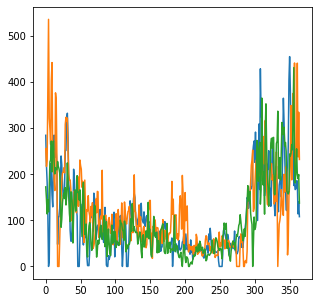

In [605]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(range(0,365),df_aqi_group_day['PM2.5'].iloc[0:(len(df_aqi_group_day)-(365*2))])
plt.plot(range(0,365),df_aqi_group_day['PM2.5'].iloc[(len(df_aqi_group_day)-(365*2)):(len(df_aqi_group_day)-(365*1))])
plt.plot(range(0,365),df_aqi_group_day['PM2.5'].iloc[(len(df_aqi_group_day)-(365*1)):(len(df_aqi_group_day)-(365*0))])
plt.show()


In [628]:

#to change to float - if not changable assigne to null
for j in list(df.columns):
    for i in range(len(df)):
        try:
            df[j].iloc[i]=float(df[j].iloc[i])
        except:
            df[j].iloc[i]=None
#to Drop Null

df.dropna(inplace=True)  
#To change data type as astype
for j in list(df.columns):
    df[j]=df[j].astype('float')
    
df.reset_index(inplace=True)
df=df.drop('index',axis=1)
df.drop(['Unnamed: 0','day'],axis=1,inplace=True)
df.to_csv('Final_DF_After_removing_Null.csv')    

C:\Users\kotad\Anaconda3\envs\TensorFlow_1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [636]:
df.head()

,avg_temp,max_temp,min_temp,rel_humidity,total_rainfall,avg_visibility,avg_windspeed,max_windspeed,PM2.5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


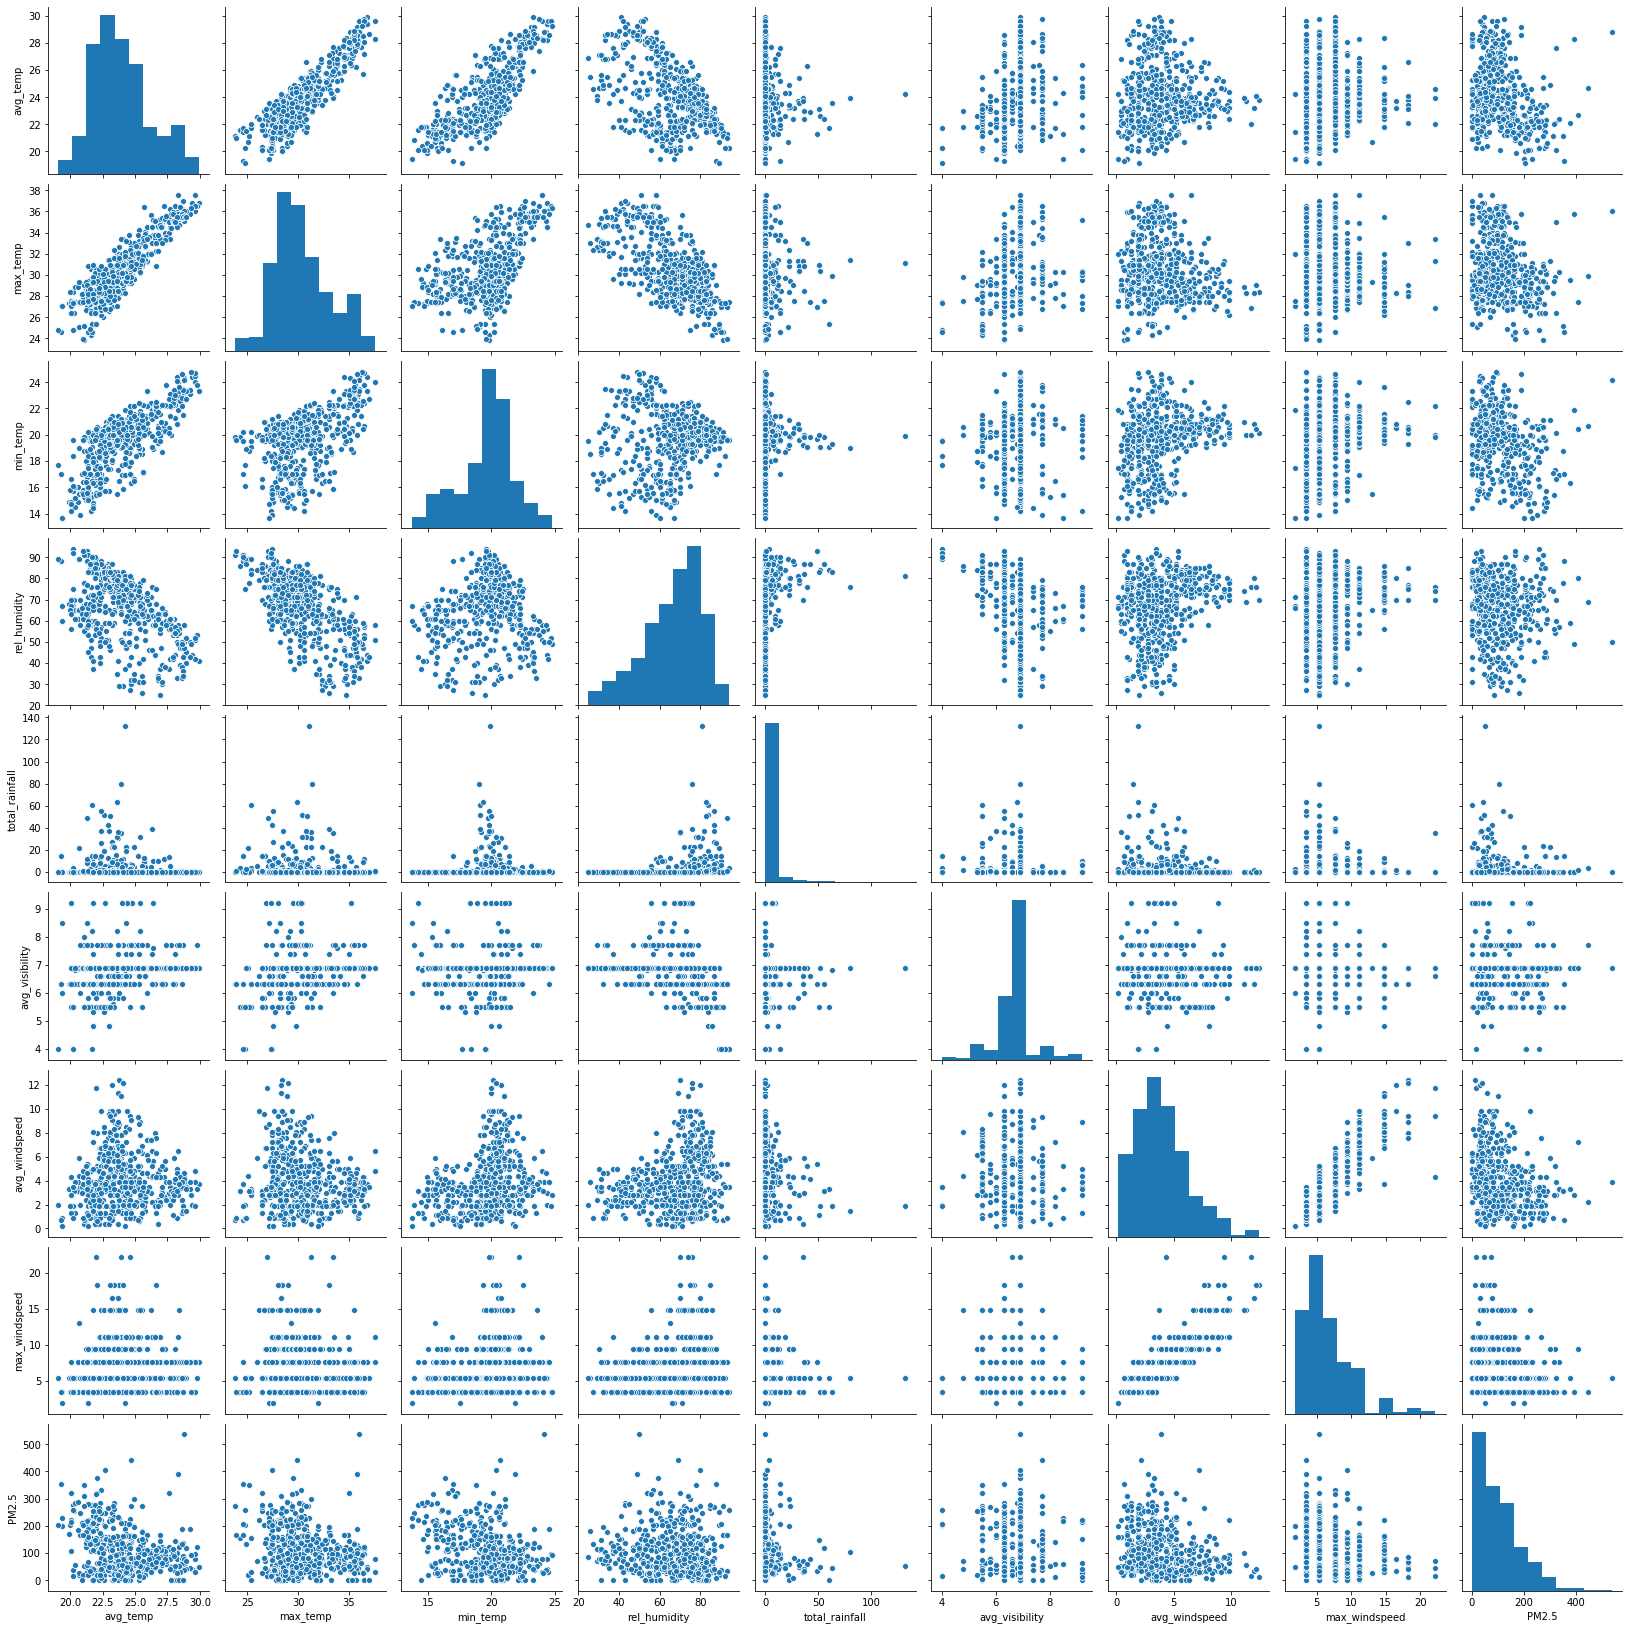

In [494]:
import seaborn as sn
sn.pairplot(df)
plt.show()


In [497]:
df_corr=df.corr()
df_corr.style.background_gradient(cmap='RdYlBu')

,avg_temp,max_temp,min_temp,rel_humidity,total_rainfall,avg_visibility,avg_windspeed,max_windspeed,PM2.5
avg_temp,1.000000,0.887203,0.755905,-0.490180,-0.075480,0.272177,0.030352,0.031052,-0.231714
max_temp,0.887203,1.000000,0.489645,-0.671032,-0.062846,0.269387,-0.135069,-0.093082,-0.151517
min_temp,0.755905,0.489645,1.000000,0.113934,0.019031,0.045189,0.265865,0.244149,-0.311118
rel_humidity,-0.490180,-0.671032,0.113934,1.000000,0.270912,-0.306116,0.276810,0.258362,-0.095872
total_rainfall,-0.075480,-0.062846,0.019031,0.270912,1.000000,-0.085930,-0.091673,-0.052454,-0.078060
avg_visibility,0.272177,0.269387,0.045189,-0.306116,-0.085930,1.000000,-0.009660,-0.039244,-0.052551
avg_windspeed,0.030352,-0.135069,0.265865,0.276810,-0.091673,-0.009660,1.000000,0.842342,-0.243878
max_windspeed,0.031052,-0.093082,0.244149,0.258362,-0.052454,-0.039244,0.842342,1.000000,-0.246163
PM2.5,-0.231714,-0.151517,-0.311118,-0.095872,-0.078060,-0.052551,-0.243878,-0.246163,1.000000


In [327]:
#Fit the models
#Check for the best accuracy
#Hypothesis testing.

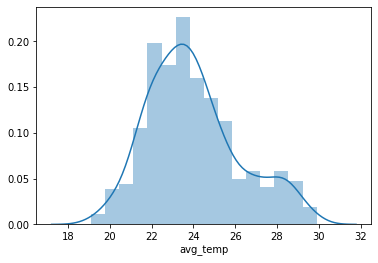

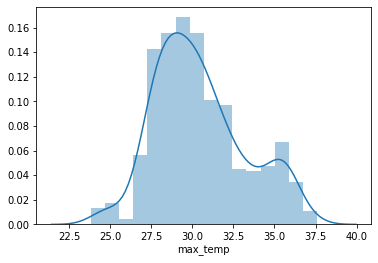

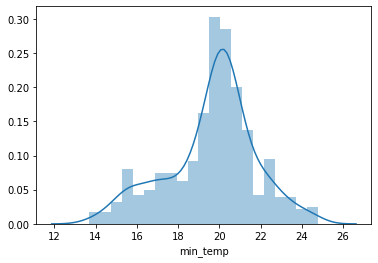

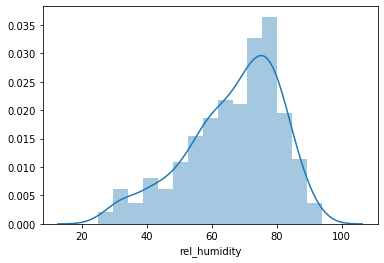

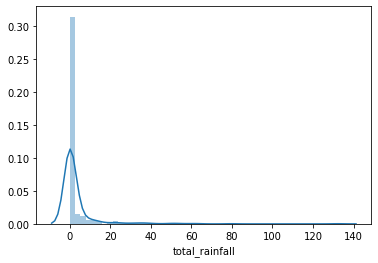

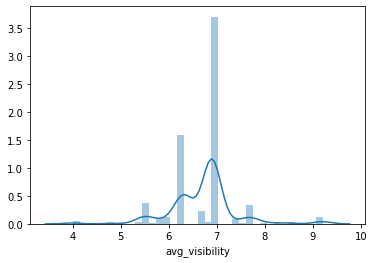

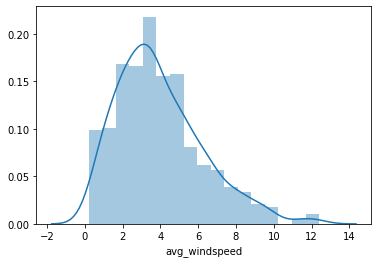

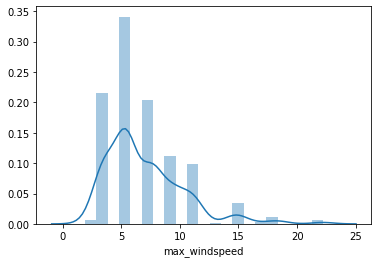

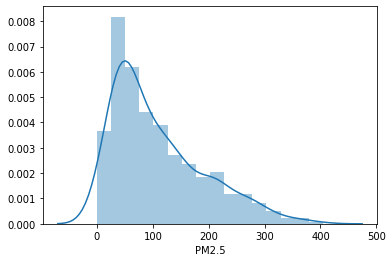

In [637]:
for i in df.columns:
    sn.distplot(df[i])
    plt.show()

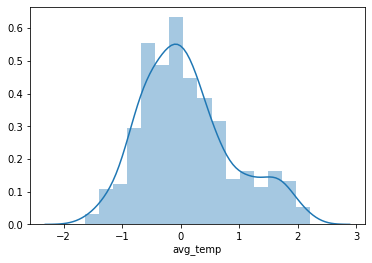

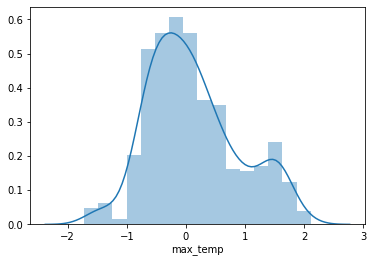

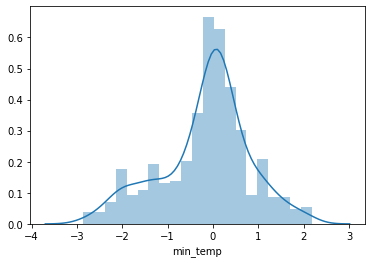

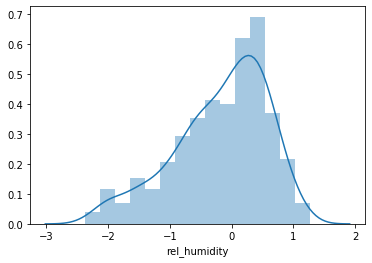

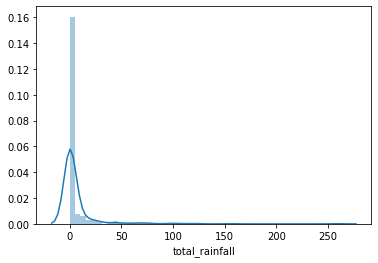

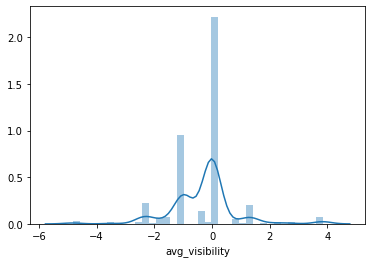

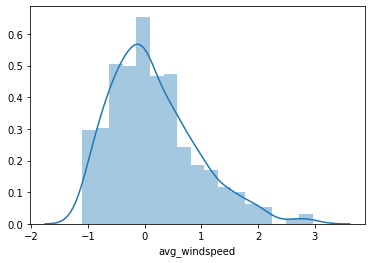

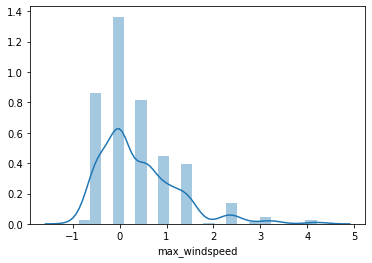

In [638]:
# We need not scale/normalize the target variabel. Only Feature variabels need to be Scaled
df_Features=df.drop('PM2.5',axis=1)
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
df_Features_Normalized=pd.DataFrame(rs.fit_transform(df_Features))
df_Features_Normalized.columns=df_Features.columns

for i in df_Features_Normalized.columns:
    sn.distplot(df_Features_Normalized[i])
    plt.show()

In [640]:
#Model Building.
#With Normalized data

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_Features_Normalized,df['PM2.5'],test_size=0.30,random_state=0)
n=250
print('In LinearRegression')
lr=LinearRegression()
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In RandomForestRegressor')
lr=RandomForestRegressor(n_estimators=n)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In XGBRegressor')
lr=XGBRegressor(n_estimators=n)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In KNeighborsRegressor')
lr=KNeighborsRegressor(n_neighbors=10)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In ExtraTreesRegressor')
lr=ExtraTreesRegressor(n_estimators=n)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

In LinearRegression
r2_score is : 0.38769378839865887
In RandomForestRegressor
r2_score is : 0.5224900365808564
In XGBRegressor
[23:36:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2_score is : 0.38720314698348623
In KNeighborsRegressor
r2_score is : 0.5187283963387685
In ExtraTreesRegressor
r2_score is : 0.5319456695225749


In [660]:
#Model Building.
#Without Normalized data

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_Features,df['PM2.5'],test_size=0.15,random_state=2)
n=350
print('In LinearRegression')
lr=LinearRegression()
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In RandomForestRegressor')
lr=RandomForestRegressor(n_estimators=n)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In XGBRegressor')
lr=XGBRegressor(n_estimators=n)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In KNeighborsRegressor')
lr=KNeighborsRegressor(n_neighbors=10)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In ExtraTreesRegressor')
lr=ExtraTreesRegressor(n_estimators=n)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

In LinearRegression
r2_score is : 0.42568320089758904
In RandomForestRegressor
r2_score is : 0.596291074552302
In XGBRegressor
[23:47:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2_score is : 0.5371735919371067
In KNeighborsRegressor
r2_score is : 0.5654607932868099
In ExtraTreesRegressor
r2_score is : 0.5477063675953739


In [642]:
#USING PCA
#Without Normalized data

from sklearn.decomposition import PCA

pca=PCA()
df_Features_pca=pd.DataFrame(pca.fit_transform(df_Features))
df_Features_pca.columns=df_Features.columns

#Model Building.

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_Features_pca,df['PM2.5'],test_size=0.15,random_state=0)
n=350
print('In LinearRegression')
lr=LinearRegression()
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In RandomForestRegressor')
lr=RandomForestRegressor(n_estimators=n)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In XGBRegressor')
lr=XGBRegressor(n_estimators=n)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In KNeighborsRegressor')
lr=KNeighborsRegressor(n_neighbors=10)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In ExtraTreesRegressor')
lr=ExtraTreesRegressor(n_estimators=n)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

In LinearRegression
r2_score is : 0.3632279684029165
In RandomForestRegressor
r2_score is : 0.34494863683507904
In XGBRegressor
[23:37:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2_score is : 0.2834820590890933
In KNeighborsRegressor
r2_score is : 0.45577078439232466
In ExtraTreesRegressor
r2_score is : 0.32210027634924754


In [644]:
#PCA
#With Normalized data
from sklearn.decomposition import PCA

pca=PCA()
df_Features_pca=pd.DataFrame(pca.fit_transform(df_Features_Normalized))
df_Features_pca.columns=df_Features.columns

#Model Building.

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_Features_pca,df['PM2.5'],test_size=0.15,random_state=1)

n=250
print('In LinearRegression')
lr=LinearRegression()
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In RandomForestRegressor')
lr=RandomForestRegressor(n_estimators=n)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In XGBRegressor')
lr=XGBRegressor(n_estimators=n)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In KNeighborsRegressor')
lr=KNeighborsRegressor(n_neighbors=10)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

print('In ExtraTreesRegressor')
lr=ExtraTreesRegressor(n_estimators=n)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

In LinearRegression
r2_score is : 0.23099189897078976
In RandomForestRegressor
r2_score is : 0.3935054363594419
In XGBRegressor
[23:38:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2_score is : 0.3215680822927547
In KNeighborsRegressor
r2_score is : 0.3587799216637313
In ExtraTreesRegressor
r2_score is : 0.41998998984041824


In [687]:
x_train,x_test,y_train,y_test=train_test_split(df_Features,df['PM2.5'],test_size=0.15,random_state=2)
n=350
print('In RandomForestRegressor')
lr=RandomForestRegressor(n_estimators=n)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

In RandomForestRegressor
r2_score is : 0.6078694032100032


In [684]:
# Highest R2 score of 60% with RandomForestRegressor after Normalizing the data:
# So we are using Linear Regression to Predict the values and test our hypothesis

x_train,x_test,y_train,y_test=train_test_split(df_Features,df['PM2.5'],test_size=0.50,random_state=2)
#x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
n=350
print('In ExtraTreesRegressor')
lr=RandomForestRegressor(n_estimators=n)
lr.fit(x_train,y_train)
y_prd=lr.predict(x_test)
print('r2_score is :',r2_score(y_test,y_prd))

#df['PM2.5_Predicted']=y_prd

In ExtraTreesRegressor
r2_score is : 0.4186566303181649


### 1.The name of the test. - Two-sample Z test.
### 2.What the test is checking. - two independent data groups and deciding whether sample mean of two group is equal or not. H0 : mean of two group is 0, H1 : mean of two group is not 0
### 3.The key assumptions of the test. - 
#### Your sample size is greater than 30. Otherwise, use a t test.
#### Data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect another data point.
#### Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.
#### Your data should be randomly selected from a population, where each item has an equal chance of being selected.
#### Sample sizes should be equal if at all possible.
### 4.How the test result is interpreted. - p-value and test stastics are given the out put. IF pval<0.05: we are rejecting H0 (Null hypothesis), Else we are accepting H0 (Null hypothesis).
### 5.Python Package for using the test. - from statsmodels.stats.weightstats import ztest

In [671]:
#Hypothesis Testing:

#We use Z test to please refer to the above assumption and result interpretation

#H0 : Difference mean of two group is 0, H1 : Difference mean of two group is not 0

from statsmodels.stats.weightstats import ztest
tset,pval=ztest(df['PM2.5'],df['PM2.5_Predicted'],value=0,alternative='two-sided')
print('P_Value:',pval)
print('Test_Statistic:',tset)
if pval<0.05:
    print('Reject H0, Evedence against null Hypothesis')
else:
    print('Accept H0,Least Evedence against null Hypothesis')
df.to_csv('Final_DF_With_Predicted_PM2_5.csv')    

P_Value: 0.8417902824648642
Test_Statistic: 0.19960402138617372
Accept H0,Least Evedence against null Hypothesis


In [685]:
#Hypothesis Testing:

#We use Z test to please refer to the above assumption and result interpretation

#H0 : Difference mean of two group is 0, H1 : Difference mean of two group is not 0

from statsmodels.stats.weightstats import ztest
zset,pval=ztest(y_test,y_prd,value=0,alternative='two-sided')
print('P_Value:',pval)
print('Test_Statistic:',zset)
if pval<0.05:
    print('Reject H0, Evedence against null Hypothesis')
else:
    print('Accept H0,Least Evedence against null Hypothesis')
df.to_csv('Final_DF_With_Predicted_PM2_5.csv')    

P_Value: 0.5491742562498725
Test_Statistic: 0.5989979430429513
Accept H0,Least Evedence against null Hypothesis


# Conclusion : 

## It is clearly evident parameters like ['avg_temp', 'max_temp', 'min_temp', 'rel_humidity', 'total_rainfall','avg_visibility', 'avg_windspeed', 'max_windspeed',] are affecting PM2.5 (Particular Matter 2.5 micro) and has the great influence over air pollution.